In [1]:
#libs
import cv2
import os
from natsort import natsorted
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#loading frames 
folder_frm='autti.co'

In [3]:
#loading data from annotations process
with open ('dataset_udacity.txt', 'r') as f:
    data = f.readlines()
data = [item.split() for item in data]

```
Output format:
    1   frame. Frame path that this annotation represents.
    2   xmin. The top left x-coordinate of the bounding box.
    3   ymin. The top left y-coordinate of the bounding box.
    4   xmax. The bottom right x-coordinate of the bounding box.
    5   ymax. The bottom right y-coordinate of the bounding box.
    6   occluded. If 1, the annotation is occluded.
    7   label. The label for this annotation, enclosed in quotation marks.
    8+  attributes. Each column after this is an attribute. (It only appears on traffic lights)
```



In [4]:
index=34
print 'There are {0} annotations'.format(len(data))
print 'Example index=%d:'% index
print data[index]
print 'FRAME = {0}'.format(data[index][0])
print 'BBOX = {0}'.format(data[index][1:5])
print 'OCCLUDED = {0}'.format(data[index][5])  #1 = true & 0= false 
print 'LABEL = {0}'.format(data[index][6])


There are 93086 annotations
Example index=34:
['1478019957687018435.jpg', '172', '556', '390', '682', '0', '"car"']
FRAME = 1478019957687018435.jpg
BBOX = ['172', '556', '390', '682']
OCCLUDED = 0
LABEL = "car"


In [5]:
def plotting_bbox(folder_frm,path_img):
    
    #get indexs
    idx_list=[i for i in range(len(data)) if data[i][0]==path_img]
    #loading img
    img = cv2.imread(os.path.join(folder_frm, path_img))
    for idx in idx_list:
        bboxes= [int(x)for x in data[idx][1:5]] 
        x_min, y_min, x_max, y_max =bboxes
        if data[idx][5]=='0':
            #blue means object is not occluded
            cv2.rectangle(img,(x_min, y_min),(x_max, y_max) ,(255, 0, 0), 3)
        else:
            #red means object is occluded
             cv2.rectangle(img,(x_min, y_min),(x_max, y_max) ,(0, 0, 255), 3)
    plt.imshow(cv2.cvtColor(img, cv2.cv.CV_BGR2RGB))
   
   
    
    



    

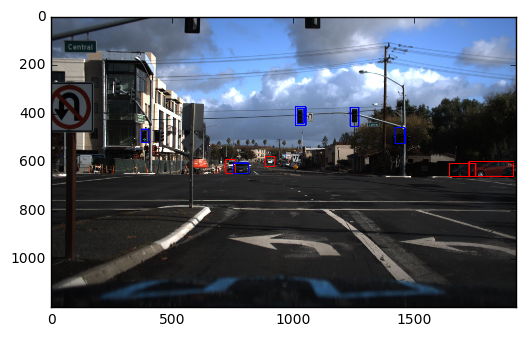

In [6]:
plotting_bbox(folder_frm,'1478020506208768819.jpg')

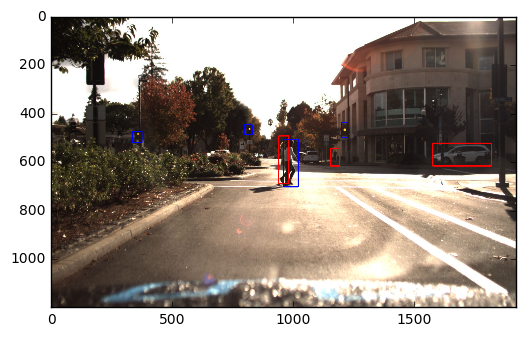

In [7]:
plotting_bbox(folder_frm,'1478020263192438788.jpg')

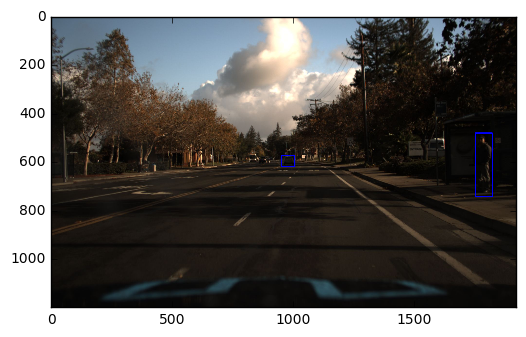

In [10]:
plotting_bbox(folder_frm,'1478019952686311006.jpg')